In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
def plot_cf(Y_test,yhat,title):
    
    from sklearn.metrics import confusion_matrix

    cf_matrix = confusion_matrix(Y_test, yhat)

    df_cm = pd.DataFrame(cf_matrix, index=["churn=0", "churn=1"], columns=["churn=0", "churn=1"])

    plt.figure(figsize=(6, 4))
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix of {title}")
    plt.show()


### Data Collection

In [4]:
df = pd.read_csv(r"C:\Users\madhavandata\Downloads\Churn_Modelling.csv")

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Data Wrangling

In [6]:
df_model = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [7]:
df_model

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
for i in df_model.columns:
    print(i)
    print("")
    print(df[i].unique())
    print("")

CreditScore

[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [9]:
df_model.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
geo_dummies=pd.get_dummies(df["Geography"])

In [11]:
geo_dummies

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [12]:
gender_dummies = pd.get_dummies(df["Gender"])

In [13]:
gender_dummies

,Female,Male
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
9995,False,True
9996,False,True
9997,True,False
9998,False,True


In [14]:
df_encoded = df_model.drop(columns=['Gender','Geography'])

In [15]:
df_encoded = pd.concat([df_encoded,geo_dummies,gender_dummies],axis=1)

In [16]:
df_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


In [17]:
df_encoded = df_encoded.replace(True,1)

In [18]:
df_encoded = df_encoded.replace(False,0)

In [19]:
df_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [20]:
df_predictors = df_encoded.drop(columns=["Exited"])

In [21]:
df_target = df["Exited"]

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing

In [23]:
df_pred_std = preprocessing.StandardScaler().fit(df_predictors).transform(df_predictors.astype("float"))

In [24]:
df_pred_std

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ...,  1.74273971,
         1.09598752, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57380915,
         1.09598752, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57380915,
         1.09598752, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57380915,
         1.09598752, -1.09598752]])

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(df_pred_std,df_target,test_size=0.3,random_state=1)

### Logistic Regression

In [26]:
parameters = {
    "C":[0.01,0.1,1,10,100],
    "penalty":["l2"],
    "solver":["lbfgs"]
}

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression()

In [29]:
lr_cv = GridSearchCV(lr,parameters,cv=5,scoring="accuracy")

In [30]:
lr_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [31]:
lr_cv.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

In [32]:
lr_cv.best_score_

0.8121428571428572

In [33]:
lr_cv.score(X_test,Y_test)

0.8113333333333334

In [55]:
metrics.accuracy_score(Y_test,lrhat)

0.8113333333333334

In [35]:
lrhat = lr_cv.predict(X_test)

In [36]:
from sklearn import metrics

In [37]:
print(metrics.classification_report(Y_test,lrhat))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2373
           1       0.69      0.18      0.28       627

    accuracy                           0.81      3000
   macro avg       0.75      0.58      0.59      3000
weighted avg       0.79      0.81      0.76      3000



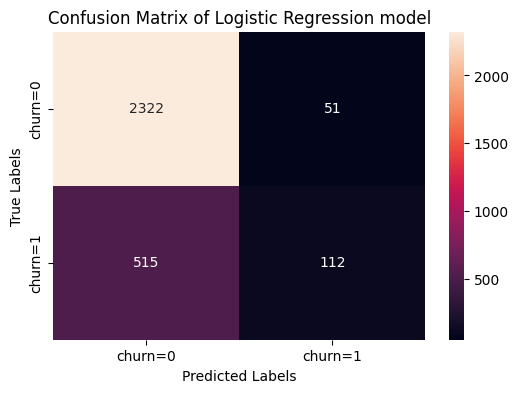

In [38]:
plot_cf(Y_test,lrhat,"Logistic Regression model")

In [39]:
metrics.log_loss(Y_test,(lr_cv.predict_proba(X_test)))

0.43333454309882646

In [40]:
metrics.jaccard_score(Y_test,lrhat,pos_label=0)

0.804016620498615

### SVM

In [57]:
from sklearn.svm import SVC

In [58]:
svm_parameters = {
    "kernel": ["linear","rbf","poly","sigmoid"],
}

In [59]:
svm = SVC()
svm_cv = GridSearchCV(svm,svm_parameters,cv=5,scoring="accuracy")

In [60]:
svm_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [61]:
svm_cv.best_params_

{'kernel': 'rbf'}

In [62]:
svm_cv.best_score_

0.8532857142857143

In [63]:
svmhat = svm_cv.predict(X_test)

In [65]:
metrics.accuracy_score(Y_test,svmhat)

0.8576666666666667

In [66]:
metrics.jaccard_score(Y_test,svmhat,pos_label=0)

0.8448401162790697

In [67]:
print(metrics.classification_report(Y_test,svmhat))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2373
           1       0.84      0.40      0.54       627

    accuracy                           0.86      3000
   macro avg       0.85      0.69      0.73      3000
weighted avg       0.86      0.86      0.84      3000



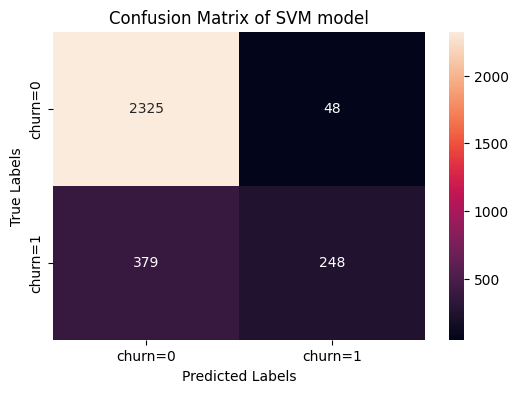

In [68]:
plot_cf(Y_test,svmhat,"SVM model")

### KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn_parameters = {
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
    "algorithm" : ["auto","ball_tree","kd_tree","brute"],
    "p" : [1,2]
}

In [43]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,knn_parameters,cv=5,scoring="accuracy")

In [44]:
knn_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy')

In [45]:
knn_cv.best_params_

{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1}

In [46]:
knn_cv.best_score_

0.8298571428571428

In [48]:
knnhat = knn_cv.predict(X_test)

In [50]:
metrics.accuracy_score(Y_test,knnhat)

0.8243333333333334

In [56]:
metrics.jaccard_score(Y_test,knnhat,pos_label=0)

0.8114490161001789

In [52]:
print(metrics.classification_report(Y_test,knnhat))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2373
           1       0.66      0.33      0.44       627

    accuracy                           0.82      3000
   macro avg       0.75      0.64      0.67      3000
weighted avg       0.81      0.82      0.80      3000



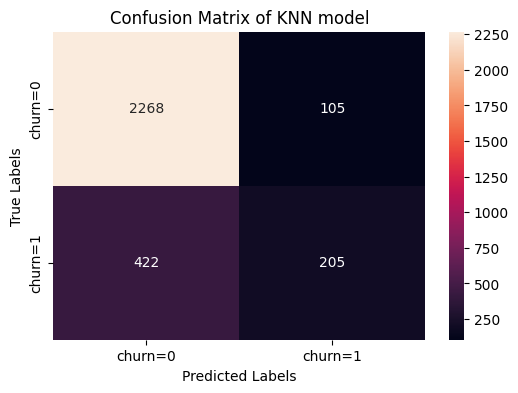

In [53]:
plot_cf(Y_test,knnhat,"KNN model")

### Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier  

In [70]:
tree_parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [71]:
tree_cv = GridSearchCV(tree,tree_parameters,cv=5,scoring="accuracy")

In [72]:
tree_cv.fit(X_train,Y_train)

C:\Users\madhavandata\anaconda3\envs\madhavanenvironment\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1620 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\madhavandata\anaconda3\envs\madhavanenvironment\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\madhavandata\anaconda3\envs\madhavanenvironment\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\madhavandata\anaconda3\envs\madhavanenvironment\lib\site-packages\s

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [75]:
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'best'}

In [76]:
tree_cv.best_score_

0.844

In [77]:
treehat = tree_cv.predict(X_test)

In [78]:
metrics.accuracy_score(Y_test,treehat)

0.828

In [79]:
metrics.jaccard_score(Y_test,treehat,pos_label=0)

0.817732250088308

In [81]:
print(metrics.classification_report(Y_test,treehat))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2373
           1       0.74      0.27      0.40       627

    accuracy                           0.83      3000
   macro avg       0.79      0.62      0.65      3000
weighted avg       0.82      0.83      0.79      3000



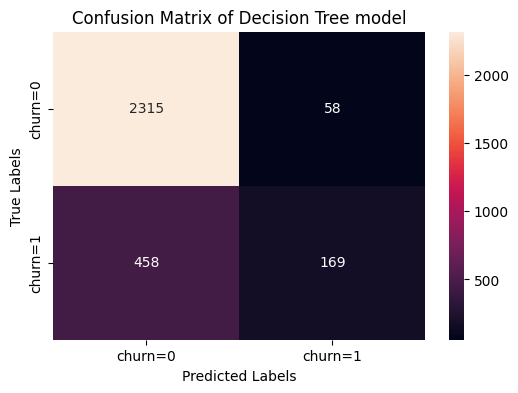

In [82]:
plot_cf(Y_test,treehat,"Decision Tree model")

In [84]:
best_tree = tree_cv.best_estimator_

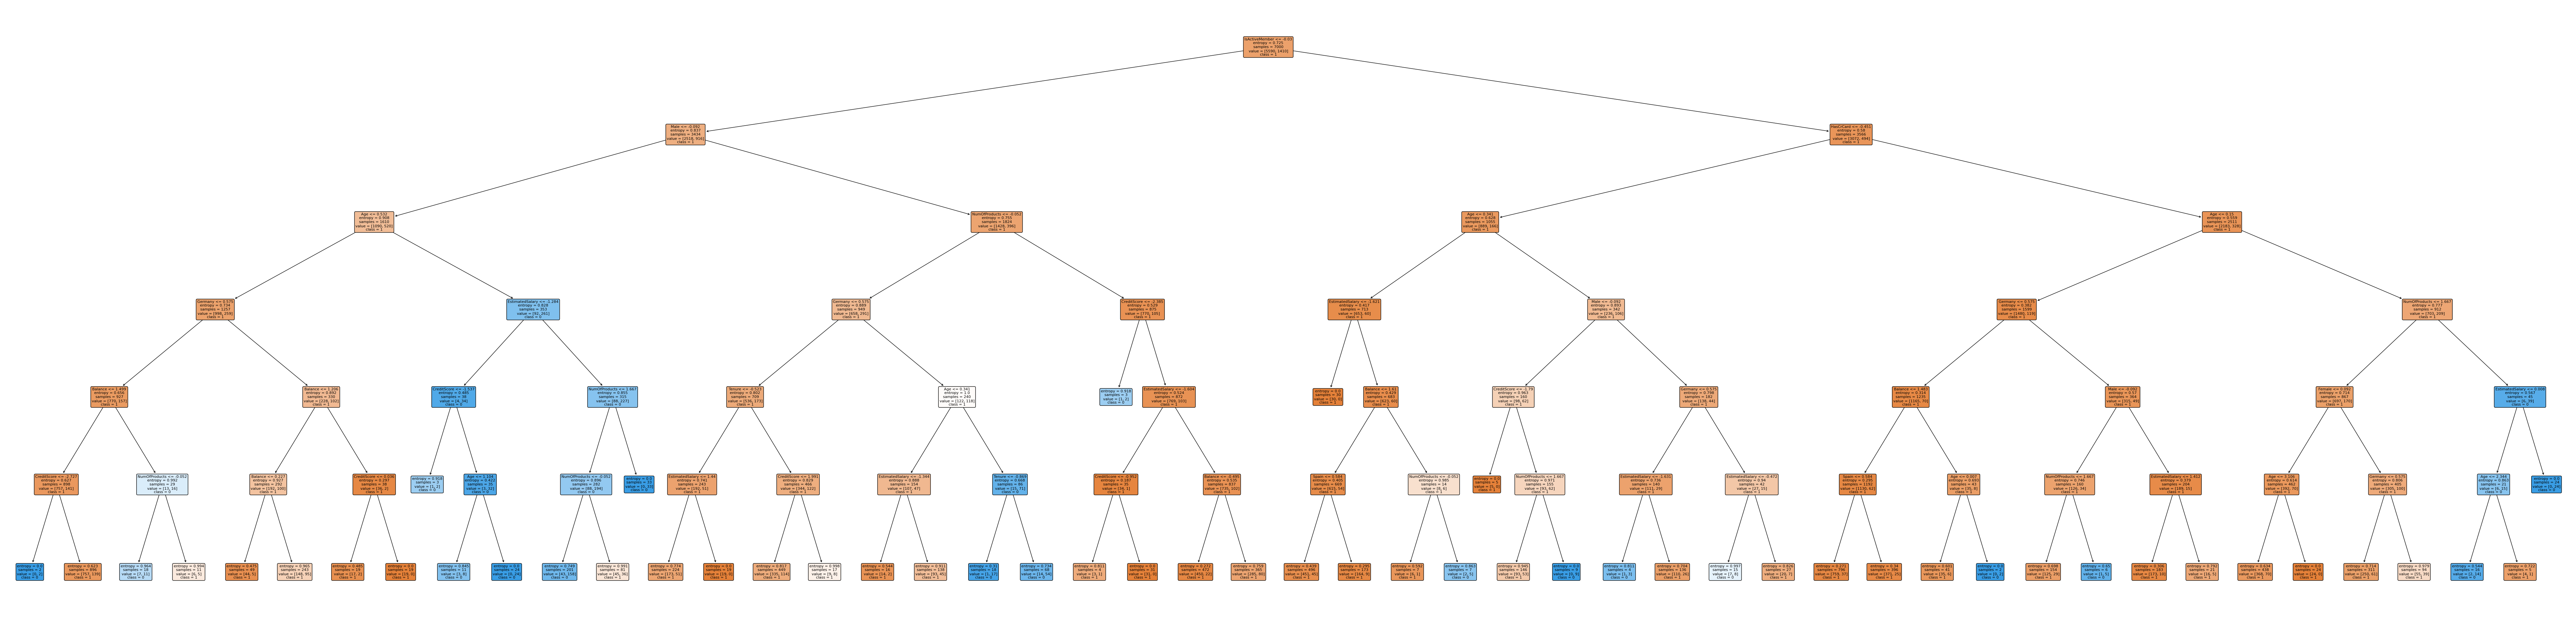

In [100]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(100, 24))
plot_tree(best_tree, filled=True, feature_names=df_predictors.columns, class_names=df_target.unique().astype(str), rounded=True)
plt.show()


